**Descrição**

Dataset: Classificação binária com um conjunto de dados de fraude de cartão de crédito

Link: https://www.kaggle.com/competitions/playground-series-s3e4/data?select=train.csv

O dataset apresenta um conjunto de transações bancárias ocorridas durante 2 dias. 
Dessas transações, ocorreram 469 fraudes em quase 219129 transações. Aqui o principal 
problema é lidar com o desbalanceamento do dataset. O problema é classificado
como classificação binária.

O dataset apresenta 30 colunas de features, 28 são características das transações 
transformadas por PCA (devido a dados confidenciais, os dados originais, utilizados 
na transformação, não foram fornecidos), as outras duas colunas são, respectivamente, 
o tempo decorrido entre cada transação e o valor da transação. Como saída, 
se espera uma classificação binária das transações, 1 para fraude e 0 caso não 
tenha sido fraude.


**Import**

Importação de bibliotecas e pacotes utilizados.

In [193]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter
from sklearn.metrics import RocCurveDisplay

**Carregamento**

Carregamento do data set

In [2]:
data_train = pd.read_csv("train.csv")
data_train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


**Análise**

Mostra como é a dritribuição de intâncias entre as labels.

In [3]:
print(data_train['Class'].value_counts())

0    218660
1       469
Name: Class, dtype: int64


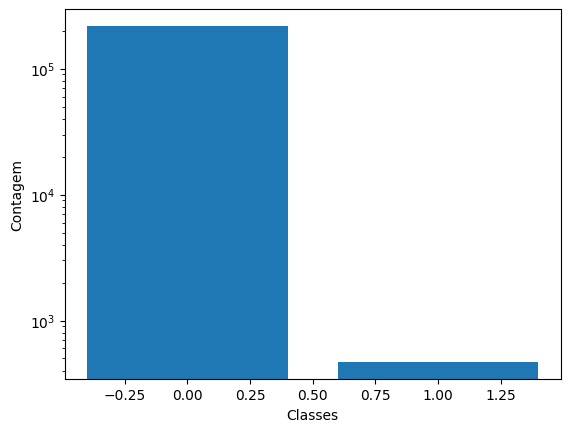

In [188]:
classes = [0, 1]
cont = [218660, 469]
plt.bar(classes, cont)
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.yscale('log')
plt.show()

Verifica se há instâncias com features vazias

In [5]:
data_train.dropna(axis=0)
data_train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


Verifica se há instâncias duplicadas.

In [6]:
duplicadas = data_train.duplicated()
if duplicadas.any():
    print("True")
else:
    print("False")

False


**Tratamento**

Filtra as features de V1 até V28 e o valor da transação

In [7]:
features = ["V1", "V2", "V3", "V4", "V5", "V6", 
            "V7", "V8", "V9", "V10", "V11", "V12", 
            "V13", "V14", "V15", "V16", "V17", "V18", 
            "V19", "V20", "V21", "V22", "V23", "V24", 
            "V25", "V26", "V27", "V28", "Amount"]
            
x_temp = pd.get_dummies(data_train[features])
x_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,...,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65
219125,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,...,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00
219126,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,...,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79
219127,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,...,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00


Filtra as labels

In [8]:
y_temp=data_train.iloc[:,31].values
y_temp

array([0, 0, 0, ..., 0, 0, 0])

Divide os dados em 20% para testes e 80%para treinamento

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_temp, y_temp,
test_size=0.2, random_state=84)

Normaliza os dados

In [10]:
scaler = MinMaxScaler()
normalized_data_train = scaler.fit_transform(x_train)
normalized_data_train = pd.DataFrame(normalized_data_train, columns=x_temp.columns)
normalized_data_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.890677,0.746096,0.841923,0.461288,0.541563,0.628071,0.444854,0.614781,0.332981,0.610477,...,0.546726,0.402687,0.642733,0.474391,0.392627,0.573079,0.355682,0.416090,0.159799,0.000000
1,0.880534,0.744868,0.842847,0.254074,0.506453,0.601618,0.431150,0.628953,0.407054,0.545930,...,0.548450,0.400181,0.595668,0.479395,0.444435,0.576137,0.536512,0.420229,0.165534,0.000314
2,0.917708,0.706246,0.781603,0.174080,0.516556,0.601711,0.438355,0.609469,0.318206,0.600974,...,0.554023,0.404969,0.639855,0.491538,0.465096,0.593863,0.345267,0.409282,0.161357,0.024080
3,0.933928,0.747087,0.725705,0.252001,0.537213,0.613879,0.451021,0.613176,0.397734,0.560704,...,0.545507,0.397375,0.575712,0.478021,0.320349,0.553524,0.447328,0.412549,0.163219,0.001070
4,0.884112,0.724520,0.819335,0.185491,0.521364,0.608044,0.448815,0.604420,0.323946,0.597223,...,0.547098,0.398347,0.587758,0.477129,0.338253,0.641921,0.337257,0.405365,0.161315,0.016040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175298,0.891069,0.746639,0.799743,0.150953,0.515541,0.569685,0.448060,0.614879,0.425448,0.535386,...,0.549931,0.397928,0.580227,0.484443,0.482646,0.553982,0.272731,0.425358,0.170143,0.001513
175299,0.917267,0.751250,0.822499,0.467107,0.525464,0.610840,0.447924,0.610924,0.312398,0.608006,...,0.552144,0.399735,0.596793,0.483339,0.434908,0.485341,0.399582,0.408277,0.158484,0.000199
175300,0.957553,0.723775,0.806724,0.311178,0.505164,0.603610,0.430330,0.612087,0.545133,0.540537,...,0.547612,0.392571,0.572678,0.481549,0.435022,0.639990,0.241618,0.415966,0.164983,0.010178
175301,0.953633,0.724109,0.822024,0.383620,0.504350,0.629782,0.425843,0.618922,0.464290,0.571693,...,0.550185,0.403035,0.604908,0.478108,0.377705,0.618443,0.309964,0.417364,0.165533,0.013244


In [11]:
normalized_data_test = scaler.transform(x_test)
normalized_data_test = pd.DataFrame(normalized_data_test, columns=x_temp.columns)
normalized_data_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.886677,0.748403,0.829166,0.236486,0.525547,0.627349,0.444705,0.623039,0.443743,0.552574,...,0.539390,0.397353,0.592480,0.478461,0.337659,0.568868,0.538571,0.417393,0.165180,0.001338
1,0.861331,0.769276,0.823576,0.292100,0.520049,0.614705,0.448617,0.605747,0.459837,0.645032,...,0.585078,0.387069,0.558326,0.478219,0.352858,0.568220,0.401898,0.419001,0.151136,0.000801
2,0.898811,0.744121,0.838401,0.365143,0.524809,0.616625,0.442928,0.619097,0.364700,0.585313,...,0.557021,0.395153,0.565648,0.484287,0.410461,0.542513,0.274238,0.428821,0.169239,0.002847
3,0.990986,0.717972,0.723042,0.247875,0.512953,0.610212,0.424850,0.611151,0.442253,0.596220,...,0.547810,0.408704,0.663318,0.484555,0.476076,0.576720,0.351423,0.410698,0.161401,0.004007
4,0.964351,0.723156,0.760899,0.267570,0.506823,0.590781,0.429645,0.610421,0.362903,0.589587,...,0.553118,0.407389,0.635412,0.481902,0.428046,0.622521,0.330783,0.414374,0.165385,0.006019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43821,0.967895,0.717052,0.740328,0.197273,0.531780,0.701189,0.416688,0.632173,0.384228,0.594911,...,0.555109,0.406479,0.627820,0.476562,0.524620,0.657705,0.345467,0.414857,0.164315,0.004007
43822,0.960302,0.727253,0.777503,0.272181,0.514673,0.604535,0.436231,0.611355,0.434730,0.553999,...,0.547603,0.400727,0.613531,0.478548,0.416099,0.607079,0.690085,0.408047,0.163933,0.006689
43823,0.906218,0.754879,0.753826,0.335089,0.538639,0.586636,0.457047,0.610459,0.350931,0.559426,...,0.547938,0.404239,0.611280,0.479397,0.435548,0.526522,0.257356,0.420452,0.171032,0.005346
43824,0.962559,0.721867,0.748252,0.244810,0.538529,0.705358,0.422157,0.635127,0.442507,0.571022,...,0.550770,0.393585,0.543984,0.485053,0.525653,0.599975,0.534771,0.410706,0.164029,0.003959


Passa o dataset para um formato que possa ser usado em k-folds

In [12]:
x_train=normalized_data_train.iloc[:,0:].values
x_test=normalized_data_test.iloc[:,0:].values

**Treinamento**

**KNN**

Define que serão feitos 5 splits no k-fold com os valores 1,3,5,10 e 20 de n_neighbors.

In [15]:
kf = KFold(n_splits=5)
kVals = [1,3,5,10,20]
media = []

Aplica k-folds no treinamento de knn e calcula a média dos splits para cada n_neighbors

In [16]:
for k in kVals:
  model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  soma = 0
  for i, (train_index, val_index) in enumerate(kf.split(x_train, y_train)):
    model.fit(x_train[train_index], y_train[train_index])
    score = model.score(x_train[val_index], y_train[val_index])
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    soma += (score *100)
  print("k=%d, media=%.2f%%" % (k, (soma/5)))
  media.append((soma/5))

k=1, accuracy=99.61%
k=1, accuracy=99.65%
k=1, accuracy=99.68%
k=1, accuracy=99.69%
k=1, accuracy=99.64%
k=1, media=99.65%
k=3, accuracy=99.75%
k=3, accuracy=99.77%
k=3, accuracy=99.81%
k=3, accuracy=99.80%
k=3, accuracy=99.77%
k=3, media=99.78%
k=5, accuracy=99.75%
k=5, accuracy=99.77%
k=5, accuracy=99.82%
k=5, accuracy=99.81%
k=5, accuracy=99.78%
k=5, media=99.78%
k=10, accuracy=99.75%
k=10, accuracy=99.77%
k=10, accuracy=99.82%
k=10, accuracy=99.81%
k=10, accuracy=99.78%
k=10, media=99.78%
k=20, accuracy=99.75%
k=20, accuracy=99.77%
k=20, accuracy=99.82%
k=20, accuracy=99.81%
k=20, accuracy=99.78%
k=20, media=99.78%


**Análise dos resultados**

In [17]:
media

[99.65488342190605,
 99.78152118970941,
 99.78494386110506,
 99.78494386110506,
 99.78494386110506]

Gráfico das médias de acc do knn

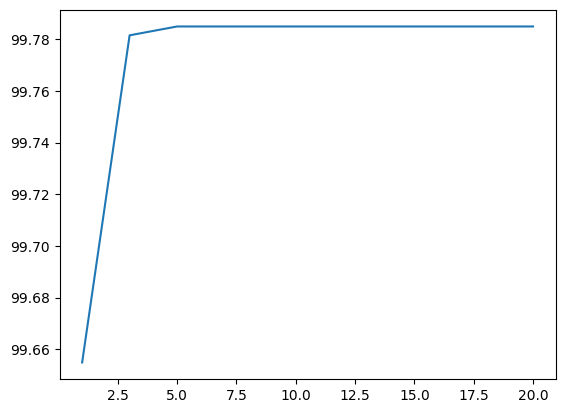

In [18]:
plt.plot(kVals, media)

Treina o modelo com o conjunto inteiro de treinamento com o melhor valor de n_neighbors

In [19]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

Cálcula a acc do modelo. 99.79%, porém o dataset está muito desbalanceado então esta acc está muito tendenciosa para a label 0

In [20]:
score = model.score(x_test, y_test)
print("accuracy=%.2f%%" % (score * 100))

accuracy=99.79%


Gera a matriz de confusão do modelo. Percebe-se que apenas uma fraude foi realmente classificada como fraude.

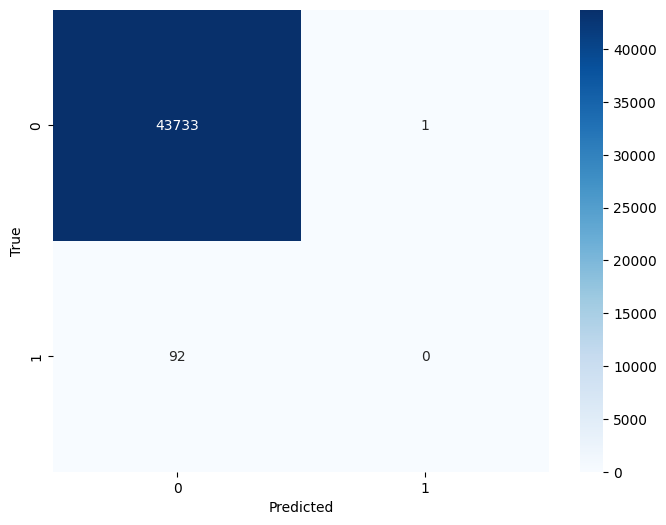

In [21]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Calcula a curva ROC do modelo. O modelo tem péssimo desempenho em distinguir de instâncias falsas e verdadeiras, já que a AUC, que indica a área de cima da curva, é igual a 0.52.

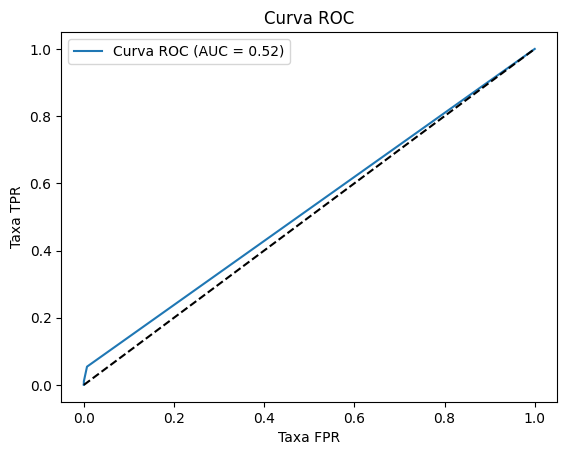

In [22]:
probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

A AUCPR mede o desempenho do modelo em termos da capacidade de prever corretamente exemplos positivos, levando em consideração a precisão. Muito usada em problemas com dados desiquilibrados. Quando mais próxima de 1, melhor será o modelo, o que indica que o modelo treinado não é o ideal.

∑ₙ(ΔR)Pₙ

Calcula a precisão, o recall e o F1 do modelo. Aqui percebe-se que a capacidade do classificador de classificar a classe 1 como classe é muito baixa, já que todos os valores deram 0.

In [23]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))


precision, recall, _ = precision_recall_curve(y_test, y_pred)

auc_pr = auc(recall, precision)

print("AUC-PR: {:.2f}".format(auc_pr))

Precisão: 0.00
Recall: 0.00
F1: 0.00
AUC-PR: 0.00


**Undersampling e Oversampling**

Mostra a distribuição de dados para cara classe no conjunto de teste

In [35]:
frequency = Counter(y_train)
for value, count in frequency.items():
    print(f"{value} : {count} ")

0 : 174926 
1 : 377 


Faz um pequeno undersampling no conjunto de treino

In [174]:
undersample = RandomUnderSampler(sampling_strategy=0.0022174)

In [175]:
x_under, y_under = undersample.fit_resample(x_train, y_train)
frequency = Counter(y_under)
for value, count in frequency.items():
    print(f"{value} : {count} ")

0 : 170018 
1 : 377 


Faz um Oversampling nos dados

In [176]:
sm = SMOTE(random_state=0)
x_resampled, y_resampled = sm.fit_resample(x_under, y_under)
frequency = Counter(y_resampled)
for value, count in frequency.items():
    print(f"{value} : {count} ")

0 : 170018 
1 : 170018 


Treina um modelo de perceptron

In [201]:
percep = Perceptron(tol=1e-3, random_state=0)

In [202]:
percep.fit(x_resampled, y_resampled)

Perceptron()

Faz a predição e mede a acc do modelo

In [203]:
y_pred = percep.predict(x_test)

In [204]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=98.69%


Plota a matriz de confusão, percebe-se uma melhora, já que mais amostras foram classificadas com fraude

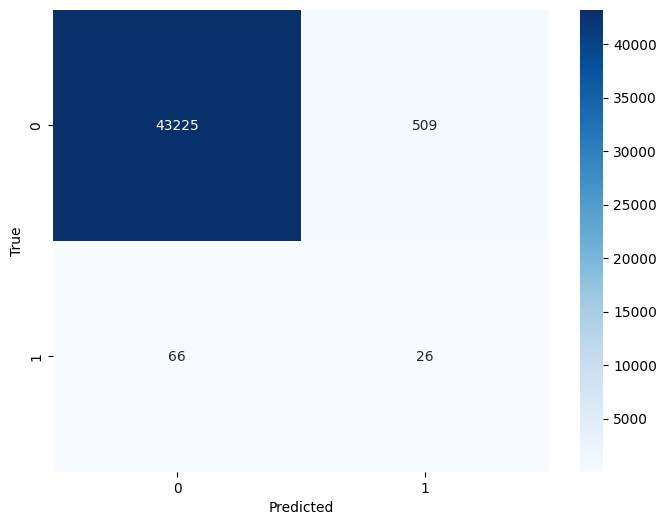

In [205]:
y_pred = percep.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Plota a curva ROC, com 0.76 de AUC

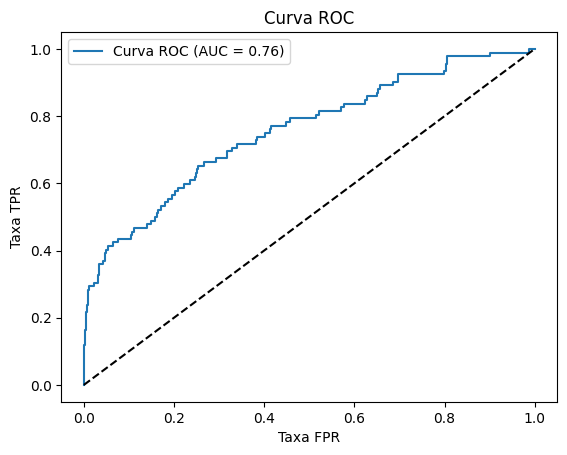

In [206]:
probs = percep.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

As outras métricas melhoraram.

In [207]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_pr = auc(recall, precision)

print("AUC-PR: {:.2f}".format(auc_pr))

Precisão: 0.05
Recall: 0.28
F1: 0.08
AUC-PR: 0.17


Treina um modelo de KNN só para ver como fica o comportamento agora

In [183]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(x_resampled, y_resampled)

KNeighborsClassifier(metric='euclidean')

A acc diminuiu

In [184]:
score = model.score(x_test, y_test)
print("accuracy=%.2f%%" % (score * 100))

accuracy=97.85%


Comparado ao modelo passado de knn, houve uma melhora na classificação de fraudes

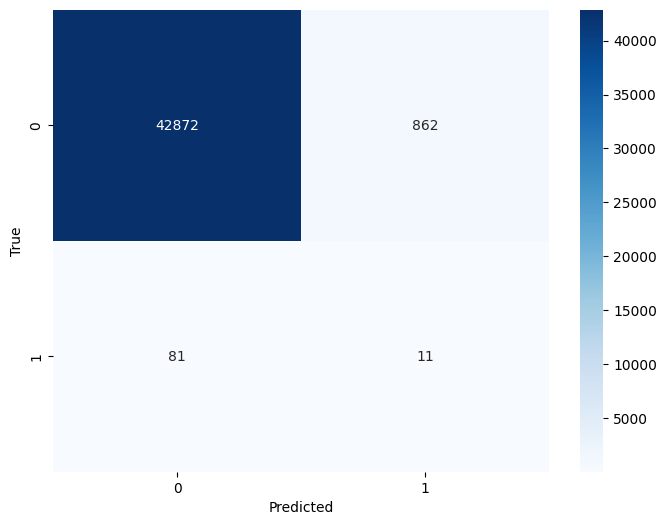

In [185]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

A AUC aumentou

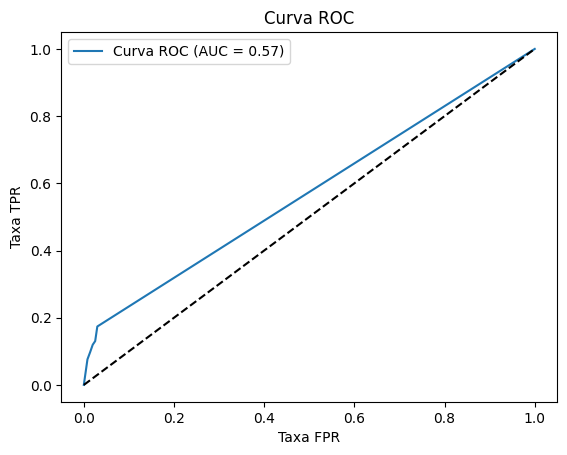

In [186]:
probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

As outras métricas melhoraram

In [187]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))


precision, recall, _ = precision_recall_curve(y_test, y_pred)

auc_pr = auc(recall, precision)

print("AUC-PR: {:.2f}".format(auc_pr))

Precisão: 0.01
Recall: 0.12
F1: 0.02
AUC-PR: 0.07


O trabalho irá seguir tentando melhorar as métricas de desempenho AUC e AUCPR. Para isso, serão utilizados outros modelos de classificação, árvore de decisão e FNN (Feedforward Neural Networks).